# Домашнеее задание: Июльский курс (2020). Pro. Занятие 1
# Введение в нейронные сети
## Верхошинская Катерина Викторовна



## LIGHT


### Вариант 1

**Задание:** Перепишите ноутбук по распознаванию рукописных цифр, восстановив следующие операции:


1.   Импорт библиотек.
2.   Загрузка базы mnist.
3.   Нормирование и преобразование x_train и y_train.
4.   Создание нейронной сети.
5.   Обучение нейронной сети.

Можно смотреть в ноутбук с занятия, но код необходимо писать самостоятельно.


**Решение:**

#### 1. Импорт библиотек.

In [ ]:
from tensorflow.keras.datasets import mnist 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense 
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras import utils
from tensorflow.keras.preprocessing import image
import numpy as np
import pylab 
from google.colab import files
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline 

#### 2. Загрузка базы mnist.

In [ ]:
(x_train_org, y_train_org), (x_test_org, y_test_org) = mnist.load_data() 

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train_org[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

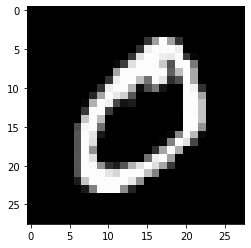

In [ ]:
n = 1
plt.imshow(x_train_org[n], cmap='gray') 
plt.show() 

#### 3. Нормирование и преобразование x_train и y_train.

In [ ]:
x_train = x_train_org.reshape(60000, 784)
x_test = x_test_org.reshape(10000, 784)
print(x_train_org.shape)
print(x_train.shape)

(60000, 28, 28)
(60000, 784)


In [ ]:
# Нормализуем входные картинки
x_train = x_train.astype('float32') 
x_train = x_train / 255 
x_test = x_test.astype('float32') 
x_test = x_test / 255 

In [ ]:
y_train_org[0]

5

In [ ]:
utils.to_categorical(y_train_org[0], 10)

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [ ]:
# Преобразуем ответы в формат one_hot_encoding
y_train = utils.to_categorical(y_train_org, 10)
y_test = utils.to_categorical(y_test_org, 10)
print(y_train.shape)

(60000, 10)


In [ ]:
print(y_train[n]) 
print(y_train_org.shape)
print(y_train_org[36])

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
(60000,)
6


#### 4. Создание нейронной сети

In [ ]:
model = Sequential()
model.add(Dense(800, input_dim=784, activation="relu"))
model.add(Dense(400, activation="relu"))
model.add(Dense(10, activation="softmax"))
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 800)               628000    
_________________________________________________________________
dense_1 (Dense)              (None, 400)               320400    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                4010      
Total params: 952,410
Trainable params: 952,410
Non-trainable params: 0
_________________________________________________________________
None


#### 5. Обучение нейронной сети

In [ ]:
model.fit(x_train, y_train, batch_size=128, epochs=15, verbose=1, validation_split=0.2)

Epoch 1/15
375/375 [==============================] - 2s 6ms/step - loss: 0.2340 - accuracy: 0.9315 - val_loss: 0.1084 - val_accuracy: 0.9667
Epoch 2/15
375/375 [==============================] - 2s 5ms/step - loss: 0.0822 - accuracy: 0.9749 - val_loss: 0.0936 - val_accuracy: 0.9703
Epoch 3/15
375/375 [==============================] - 2s 5ms/step - loss: 0.0497 - accuracy: 0.9838 - val_loss: 0.0867 - val_accuracy: 0.9752
Epoch 4/15
375/375 [==============================] - 2s 5ms/step - loss: 0.0346 - accuracy: 0.9887 - val_loss: 0.0866 - val_accuracy: 0.9754
Epoch 5/15
375/375 [==============================] - 2s 5ms/step - loss: 0.0266 - accuracy: 0.9914 - val_loss: 0.0916 - val_accuracy: 0.9748
Epoch 6/15
375/375 [==============================] - 2s 5ms/step - loss: 0.0234 - accuracy: 0.9921 - val_loss: 0.0889 - val_accuracy: 0.9776
Epoch 7/15
375/375 [==============================] - 2s 5ms/step - loss: 0.0174 - accuracy: 0.9939 - val_loss: 0.0952 - val_accuracy: 0.9758
Epoch 

In [ ]:
model.save_weights('model.h5')
model.load_weights('model.h5')

#### Тестирование 

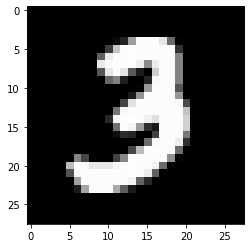

In [ ]:
n_rec = 7771
plt.imshow(Image.fromarray(x_test_org[n_rec]).convert('RGBA'))
plt.show()

In [ ]:
x = x_test[n_rec]
x = np.expand_dims(x, axis=0)
prediction = model.predict(x)
print(prediction)

[[4.25010764e-24 3.42128808e-18 2.50968636e-16 1.00000000e+00
  8.60313376e-22 9.04522659e-13 4.85260483e-26 7.15482692e-18
  3.90962271e-16 1.14342265e-14]]


In [ ]:
prediction = np.argmax(prediction)
print("То что распознала сеть:", prediction)
print("Правильный ответ:" , y_test_org[n_rec])

То что распознала сеть: 3
Правильный ответ: 3


## PRO

**Задание:** Распознайте рукописную цифру, созданную вами с помощью графического редактора (например, Paint).
Последовательность шагов:
В графическом редакторе рисуем произвольную цифру.
Сохраняем документ и загружаем его в Collaboratory.
С помощью функции image.load_img(path, target_size=(28, 28), color_mode = ‘grayscale’) загружаем картинку в переменную.
С помощью функции image.img_to_array(img) преобразуем изображение в numpy-массив.
Выполняем инверсию цветов, нормирование и решейп массива.
Выполняем распознавание собственной рукописной цифры.
Реализуйте тот же алгоритм для написанной на листе от руки цифры (для этого необходимо сделать дополнительную предобработку изображения).


**Решение:**

In [ ]:
from google.colab import files
files.upload()

Saving 9.png to 9.png


{'9.png': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01\x18\x00\x00\x01\x18\x08\x06\x00\x00\x00\x87\x8e\xe9\x8c\x00\x00\x00\x01sRGB\x00\xae\xce\x1c\xe9\x00\x00\x00\x04gAMA\x00\x00\xb1\x8f\x0b\xfca\x05\x00\x00\x00\tpHYs\x00\x00\x12t\x00\x00\x12t\x01\xdef\x1fx\x00\x00\x16\x9dIDATx^\xed\xdd[\x88U\xe5\xff\xc7\xf1\xc7<\x8f\xc7Qg\x1c\x1d\xfdYVj)\x06\x99\x17\x91\x10TP\x94P\x11t2\n\xea\xa2+!\xe8F\xa8.\x82\xc0\x8b\xb4\xdb\x88\xe8.\xc2,\x8c,\x043\x0f\x1d\xc8\x0e\x16j\nf:\xe3\xa1q\xb41-\xc7\xc3\x98\x87\xfe}\x9e\xdf~\xfc\xaf\xdfv\x1dg\xf6\xd7\xbd\xf7\xf8~\xc1\x97\x19\xf7~f\xad\xb5\x0f\xeb\xe3\x9aY\xdf\xf5\xec\x01\xff\xfc\xcb\x01\x80\x81kJ_\x01\xa0\xe2\x08\x18\x00f\x08\x18\x00f\x08\x18\x00f\x08\x18\x00f\x08\x18\x00f\x08\x18\x00f\x08\x18\x00f\x08\x18\x00f\x08\x18\x00f\x08\x18\x00f\x08\x18\x00f\x08\x18\x00f\x08\x18\x00f\x08\x18\x00f\x08\x18\x00f\x08\x18\x00f\x08\x18\x00f\x08\x18\x00f\x08\x18\x00f\x08\x18\x00f\x08\x18\x00f\x08\x18\x00f\x08\x18\x00f\x08\x18\x00f\x08\x18\x00f\x08\x18\x00f\x08\x18\x0

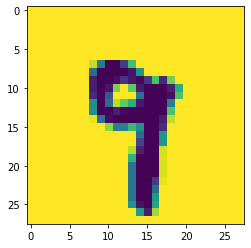

In [ ]:
img = image.load_img('9.png', target_size=(28, 28), color_mode = 'grayscale') 
digital_arr = image.img_to_array(img)
plt.imshow(img) # отрисуем картинку, чтобы посмотреть правильность загрузки

In [ ]:
print("Размер до решейпа:",digital_arr.shape)
my_test = digital_arr.reshape(784, 1)
print("Размер после решейпа:",my_test.shape)

# нормализация
my_test = my_test.astype('float32') 
my_test = my_test / 255 

my_test = abs(my_test - 1) # инверсия цвета

Размер до решейпа: (28, 28, 1)
Размер после решейпа: (784, 1)


In [ ]:
my_x = my_test.reshape(1, 784)
my_prediction = model.predict(my_x)
print(my_prediction)

result_prediction = np.argmax(my_prediction) 
print("Результат: ", result_prediction)

[[2.2565042e-12 6.3521594e-10 5.2226769e-12 7.3468809e-10 5.6194345e-05
  4.6832944e-11 1.1941864e-14 3.7349971e-06 1.2198837e-09 9.9994004e-01]]
Результат:  9
